100%|██████████| 9912422/9912422 [00:00<00:00, 110747184.40it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 46680421.51it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 108903100.49it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7332767.04it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



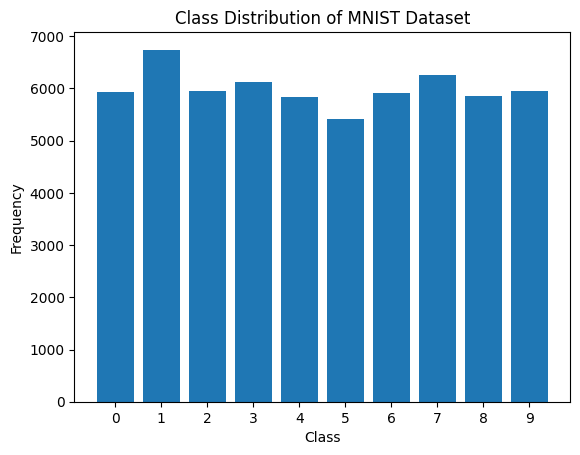

In [1]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

# Define a transformation to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Create a data loader for the training dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Initialize a dictionary to store class frequencies
class_frequency = {}

# Count the occurrences of each class in the dataset
for images, labels in train_loader:
    for label in labels:
        class_idx = label.item()
        if class_idx in class_frequency:
            class_frequency[class_idx] += 1
        else:
            class_frequency[class_idx] = 1

# Extract class indices and corresponding frequencies
class_indices = list(class_frequency.keys())
frequencies = [class_frequency[idx] for idx in class_indices]

# Create a bar plot
plt.bar(class_indices, frequencies)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution of MNIST Dataset')
plt.xticks(class_indices)
plt.show()


Files already downloaded and verified


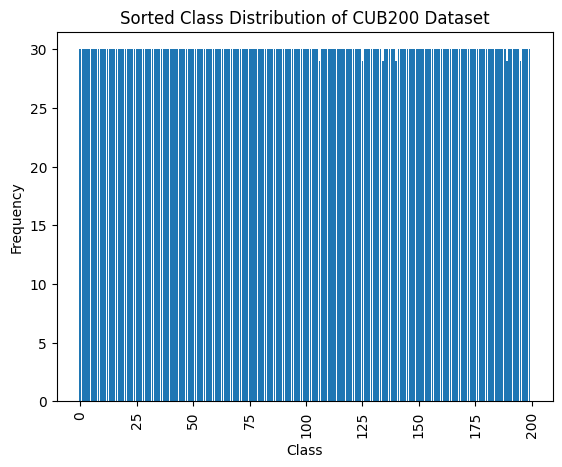

In [4]:
from avalanche.benchmarks.datasets import CUB200
from torchvision.transforms import Compose, ToTensor, Normalize, RandomCrop
import torchvision.transforms as transforms

# Define a transformation to normalize the data
resize_transform = transforms.Resize((224, 224))
grayscale_transform = transforms.Grayscale(num_output_channels=3)
train_transform = Compose([
    resize_transform,
    grayscale_transform,
    ToTensor()
    
])

# Download and load the training dataset
train_dataset  = CUB200(
    './data/cub200', train=True, download=True, transform=train_transform
)


# Create a data loader for the training dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Initialize a dictionary to store class frequencies
class_frequency = {}

# Count the occurrences of each class in the dataset
for images, labels in train_loader:
    for label in labels:
        class_idx = label.item()
        if class_idx in class_frequency:
            class_frequency[class_idx] += 1
        else:
            class_frequency[class_idx] = 1

# Sort the class frequencies in descending order
sorted_class_frequency = sorted(class_frequency.items(), key=lambda x: x[1], reverse=True)
class_indices, frequencies = zip(*sorted_class_frequency)

# Create a sorted bar plot
plt.bar(class_indices, frequencies)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Sorted Class Distribution of CUB200 Dataset')
plt.xticks(rotation=90)
plt.show()

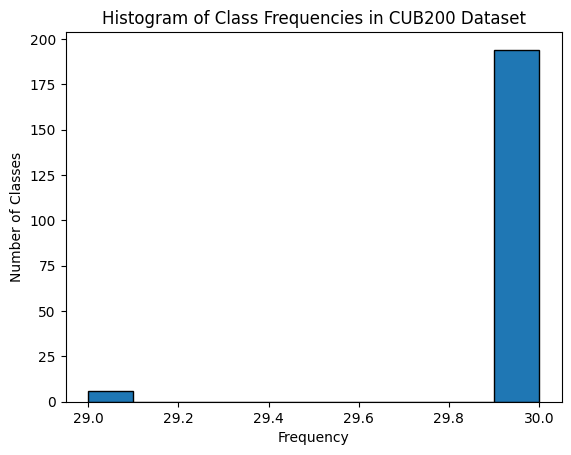

In [7]:
# Extract frequencies and create a histogram
frequencies = list(class_frequency.values())
plt.hist(frequencies, bins=10, edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Number of Classes')
plt.title('Histogram of Class Frequencies in CUB200 Dataset')
plt.show()